# SVM

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"

def save_fig(fig_id, tight_layout=True):
    #path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    path =fig_id + '.png'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# 라지 마진 분류

In [8]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2,3)]
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 모델
svm_clf = SVC(kernel='linear', C = float('inf'))
svm_clf.fit(X,y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

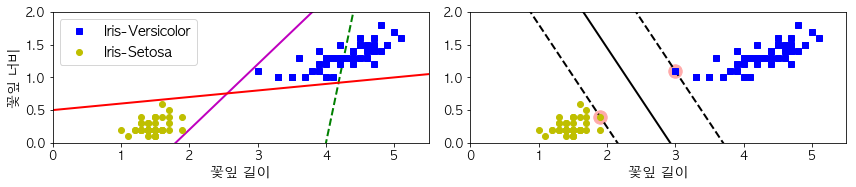

In [11]:

# 나쁜 모델# 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

# 스케일에 민감함

/Users/juhyung/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[-2, 2, -2, 2]

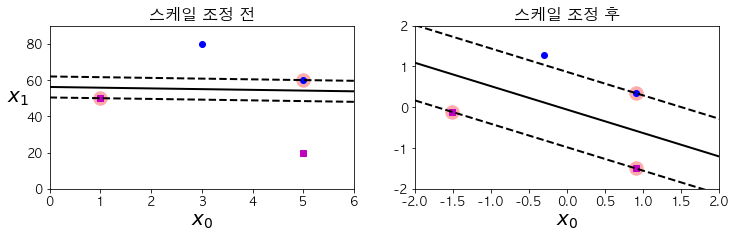

In [5]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]])
ys = np.array([0,0,1,1])
svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:,1][ys==1], 'bo')
plt.plot(Xs[:, 0][ys==0], Xs[:,1][ys==0], 'ms')
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("스케일 조정 전", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("스케일 조정 후", fontsize=16)
plt.axis([-2, 2, -2, 2])

# 이상치에 민감함

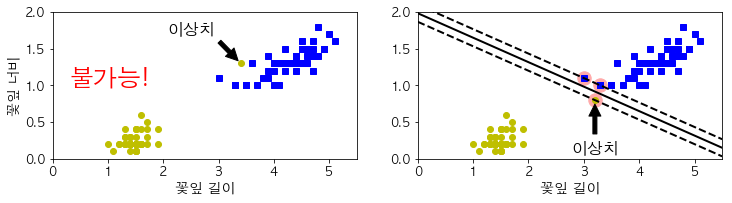

In [14]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**10)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "불가능!", fontsize=24, color="red")
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.annotate("이상치",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.annotate("이상치",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
plt.show()

(0, 2)

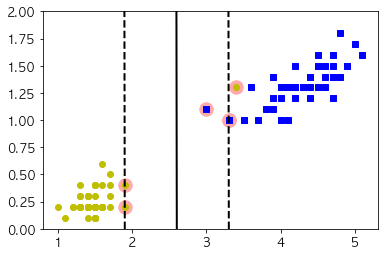

In [22]:
test = SVC(kernel='linear', C = 1000)
test.fit(Xo1, yo1)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")

plot_svc_decision_boundary(test, 1, 5)
plt.ylim(0,2)

# 라지 마진 VS 마진 오류

In [16]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y =(iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss='hinge'))
])

svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [17]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [35]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [36]:
# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에 
# LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

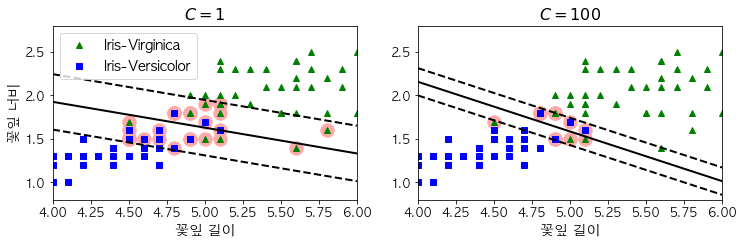

In [37]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

# 비선형 분류

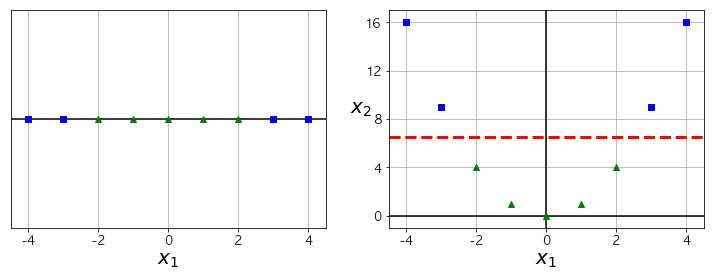

In [49]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1,1,0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

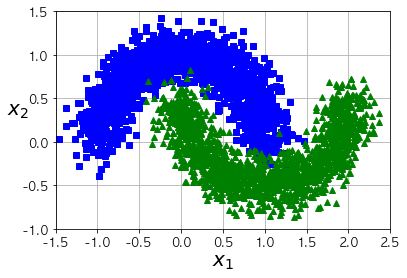

In [42]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=3000, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ('poly_features',PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=100, loss='hinge'))
])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=100, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

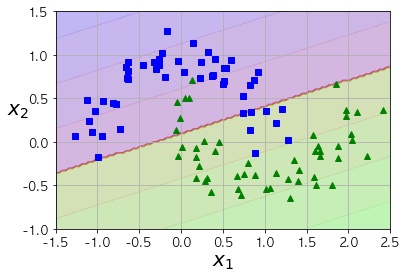

In [41]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

# PolynomialFeature == 1 일때
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

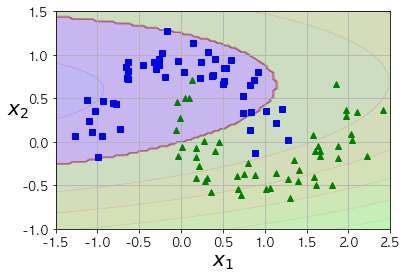

In [43]:
# PolynomialFeature == 2 일때
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

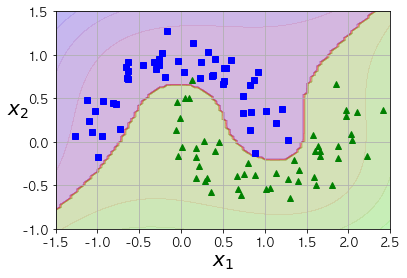

In [45]:
# PolynomialFeature == 3 일때
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

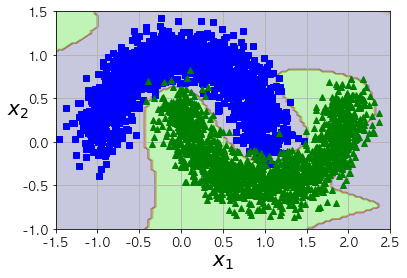

In [46]:
# PolynomialFeature == 100 일때
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

### 하지만 이렇게 모든 데이터를 더 높은 차원의 공간으로 옮기는 것은 계산량이 엄청나게 많아짐 -> 사용 불가능

### Kernel trick 덕분에 가능

In [60]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly',degree=3, coef0=1, C= 5))
])

poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [65]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

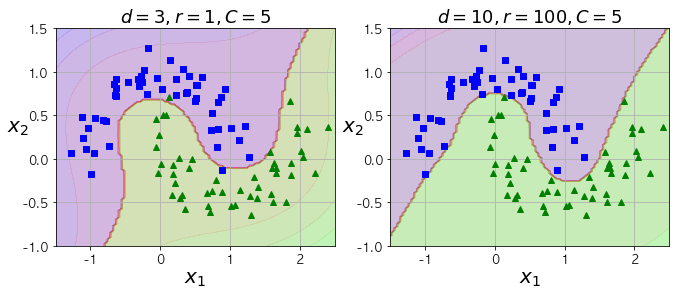

In [64]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

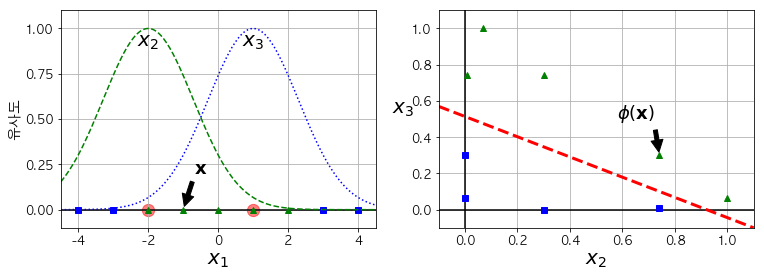

In [50]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"유사도", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

In [51]:
# 이건 사실 뭐진 모르겠음, 랜드마크?
x1_example  = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


In [72]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

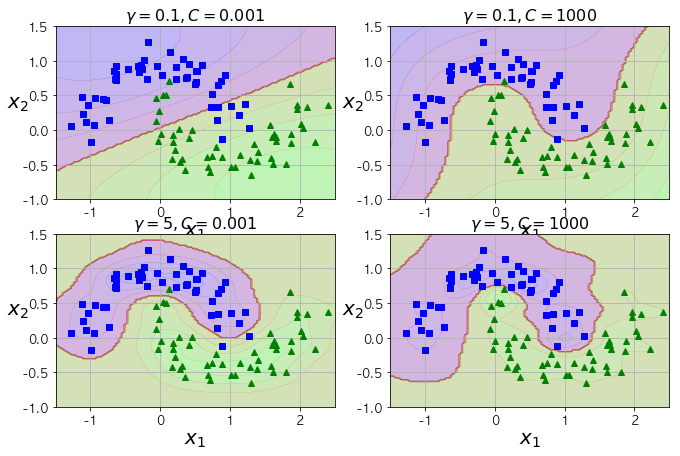

In [73]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

# 회귀

In [74]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [75]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [76]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

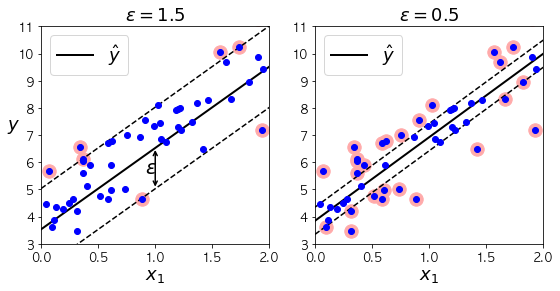

In [77]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

plt.show()

In [52]:
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X ** 2 +np.random.randn(m, 1)/10).ravel()

In [64]:
from  sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=1, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

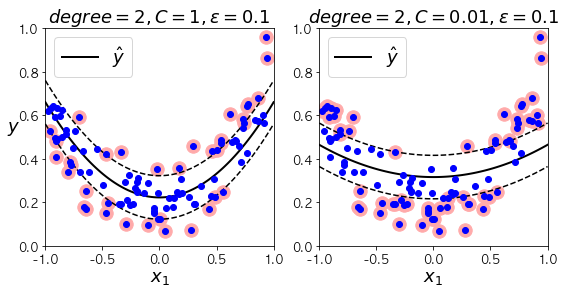

In [65]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

plt.show()

# 라이브러리

LinearSVC : 속도가 빠름

SGDClassifier(loss='hinge', alpha=1/(m*C)) : SGD를 사용한 선형 svm 분류기

SVC(kernel='linear', C=100) : 큰 데이터 셋에서 엄청 느림.

---
|Class|Time complexity|Out of score support|Scaling required| Kernel Trick|
|:--:|:--:|:--:|:--:|:--:|
|Linear SVC| $O(mn)$ |No |Yes|No|
|SGDClassifier | $O(mn)$ |Yes |Yes|No|
|SVC| $O(m^2n)$ to $O(m^3n)$ |No |Yes|Yes|

# 이론

In [117]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

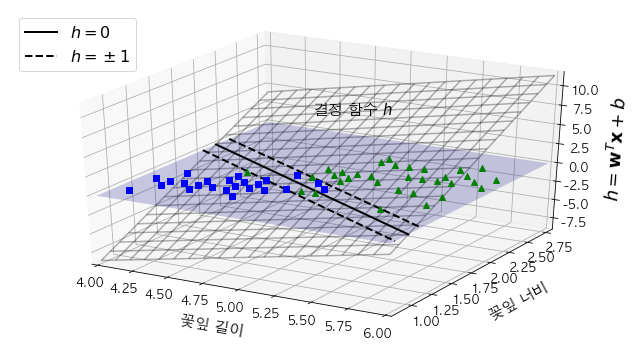

In [118]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "결정 함수 $h$", fontsize=15)
    ax.set_xlabel(r"꽃잎 길이", fontsize=15, labelpad=15)
    ax.set_ylabel(r"꽃잎 너비", fontsize=15, rotation=25, labelpad=15)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=10)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

plt.show()

# 작은 가중치 벡터가 라지 마진을 만듭니다.

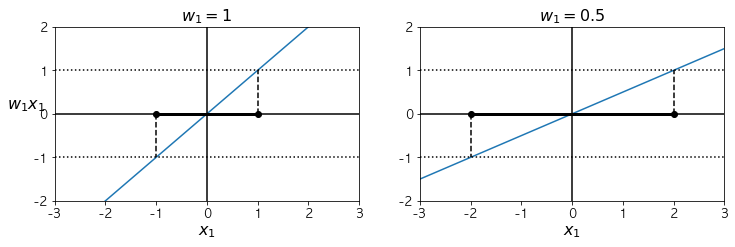

In [120]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)
    
plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plot_2D_decision_function(1, 0)
plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel=False)
plt.show()

# SVM

<center> ![title](vapnik.png) </center>

Valdimir N. Vapnik, Alexey Ya. Chervonenkis 가 1963 개발

커널 트릭이 나오면서 기계학습의 한 시대를 풍미했던 알고리즘.

당시 MLP가 활발히 연구 중이었는데 커널 트릭이 나오면 MLP를 잠재움


**SVM의 역사**

https://www.kdnuggets.com/2016/07/guyon-data-mining-history-svm-support-vector-machines.html

http://www.svms.org/history.html

# Idea

![title](large_margin_classification_plot.png)

가장 좋은 Decision rule 을 어떻게 정할까? $\rightarrow$

### 두 서포트 벡터를 잇는 평행한 두 선 사이의 거리(margin, width)를 최대로 하자!

<br>

수많은 linear classifier 중에 단 하나의 제일 좋은 classifier를 찾는 것 

# 1. 선형 분류기

![title](3.png)

$w$ 는 직선, 점선에 수직인 normal vector.

$u$ 를 $w$ 에 투영시킨 $\bar{w} \bar{u}$ 이 $b$ 이상이면 직선보다 오른쪽에 있다는 뜻

즉, $\bar{w} \cdot \bar{u} \geq b = \bar{w} \cdot \bar{u} + b \geq 0$ 이면 positive,

아니면, negative

# 2. SVM classifier

![title](1.png)
<br><br>

> $\bar{w} \cdot x_i + b \geq 1$ 이면 positive,$(y_i = 1)$

<br><br>

> $\bar{w} \cdot x_i + b \leq -1$ 이면, negative. $(y_i = -1)$

<br><br>
다르게 표현해보면,

### **Positive 일 때,** (y == 1)
<br><br>

> $y_i (\bar{w} x_i + b) \geq 1 $

<br><br>

### **Negative 일 때,** (y == -1)

<br><br>

$(\bar{w} x_i + b) \leq -1$ 양 변에 y(== -1)를 곱하면,

<br><br>

> $y_i (\bar{w} x_i +b) \geq 1$

<br><br>
**Positive** **Negative** 일 때의 조건은 $y_i (\bar{w} x_i +b) \geq 1$ 로 같음.

결국, Decision rule 은
<br>
$$h=y_i (\bar{w} x_i +b) -1 =0$$
<br>
그러면, 두 decision rule,

$\bar{w} \cdot x_i + b \geq 1 , ~~~~~~~~~~~~~\bar{w} \cdot x_i + b \leq -1$ 

사이의 거리인 margin(width)는 어떻게 구할까?

# 3. margin
margin 은 평행한 두 직선 사이의 거리이므로 $(x_+ - x_-)$ 에 unit vector($\bar{w}$ 가 normal 이므로 )를 곱해주면 된다.

![title](2.png)

margin = $(x_+ - x_-) \frac{\bar{w}}{\|w\|}$, 여기서

$\bar{w} x_i +b =1 ~ \rightarrow ~~~~~ $  $\bar{w} x_i= 1 - b$ 이므로

$$ (x_+ - x_-) \frac{\bar{w}}{\|w\|} = (1-b + 1 + b)\frac{\bar{w}}{\|w\|} = \frac{2}{\|w\|}$$

<br><br><br>
margin 을 최대화 하는 것이 목표였음.
$$max \frac{2}{\|w\|}$$
<br>목표를 이렇게 바꿀 수 있음<br>
$$max \frac{2}{\|w\|} ~ = ~ max \frac{1}{\|w\|} ~ \rightarrow ~ min \|w\| ~ \rightarrow ~ min \frac{1}{2} \|w\| ^2$$

최적화 문제임 -> Quadratic programming problem (많은 solver가 존재함. 빠르게 해를 찾을 수 있지만, kernel trick 적용 불가)

# Constrained optimization

## recap
<br><br>

$$minimize ~~ f(x)$$
$$subject ~~ to ~~ g_i(x) \leq 0, ~~ for ~~ i = 1,...,m$$

<br><br>
$x_0$ 이 해가 될 조건: <br>

$$\frac{\partial}{\partial x} (f(x) + \sum_i \alpha g_i(x)) = 0, ~~ \alpha = Lagrange~multiplier$$
$$g_i(x) \leq 0, ~~ for ~~ i = 1,...,m $$ 
$$x = x_0$$

<br><br>
이것을 만족하는 lagrange multiplier $\alpha$ 는 항상 존재한다는 정리가 있음.(lagrange multiplier는 항상 0이상임.
<br><br>

$f(x) + \sum \alpha g(x)$ = Lagrangian (L) 이라고 부름

<br><br>

> **Lagrangian 의 gradient를 0으로 만드는 x가 답**


<br><br>
## 적용

$$minimize ~~ \frac{1}{2} \|w\|^2$$
$$subject ~~ to ~~ 1-y_i(\bar{w} x_i +b) \leq 0$$

<br>

Larangian = $\frac{1}{2}\|w\|^2 + \sum^n \alpha_i (1-y_i(\bar{w^T} x_i +b))$

gradient of Lagrangian w.r.t $\bar{w}, \bar{b}$ (변수가 w, b 가 있으니 둘 다 구함)

> $$\frac{\partial}{\partial \bar{w}}L = w + \sum \alpha_i (-y_i)x_i = 0 ~~ \rightarrow ~~ w = \sum \alpha_i y_i x_i$$

> $$\frac{\partial}{\partial \bar{b}} L = \sum \alpha_i y_i = 0$$

이 두 개를 lagrangian에 적용 <br><br>
$$L= \frac{1}{2}\|w\|^2 + \sum^n \alpha_i (1-y_i(\bar{w^T} x_i +b))$$
$$= \frac{1}{2} \sum \alpha_i y_i x_i^T \sum \alpha_j y_j x_j + \sum \alpha_i (1-y_i(\sum \alpha_j y_j x_j^Tx_i + b))$$

$$= \frac{1}{2} \sum \sum \alpha_i \alpha_j y_i y_j x_i^T x_j + \sum \alpha_i - \sum \alpha_i y_i \sum \alpha_j y_j x_j^T - b \sum \alpha_i y_i$$

$$= - \frac{1}{2} \sum \sum \alpha_i \alpha_j y_i y_j x_i^T x_j + \sum \alpha_j$$

마지막으로 얻게 되는 식에서 결국 변수는 lagrangian multiplier 만 있음 -> $\alpha$ 에 대한 함수

# Dual Problem

위의 식은 **Dual problem**로 표현 할 수 있음

> Dual Problem: w를 알면 $\alpha$ 를 구할 수 있고, $\alpha$ 를 알면 w를 구할 수 있는 형태

$$max ~~ W(\alpha) = \sum \alpha_i \frac{1}{2} \sum \alpha_i \alpha_j y_i y_j x_i^T x_j$$
$$subject ~~ to ~~ \alpha_i \geq 0, ~~ \sum \alpha_i y_i = 0$$

- Dual problem은 정확한 해를 찾는 것이 아니고 primal problem의 lower bound를 찾는 것임.
- 그런데 KKT(Karush-Kuhn-Tucker) 조건을 만족하면 dual의 해와 primal problem의 해가 같음.
- SVM 문제는 KKT 조건을 만족하니 dual problem의 해를 구하면 됨.
- Dual로 풀어야 kernel trick이 가능함.

- Dual로 푸는게 데이터의 수가 feature의 수보다 작을 때 더 빠름 -> 어떤 분야에 이런 데이터가 있는진 모르겟움..

<a href="https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions">KKT 위키</a>


이것 역시 Quadratic programming 임, 즉 항상 $\alpha^*$를 찾을 수 있다는 것.
<br><br>
$\alpha^*$를 찾으면 위에서 구한 $w = \sum \alpha_i^* y_i x_i$로 w를 구할 수 있음.

> w를 구하면 끝 -> 항상 global optimum을 찾을 수 있음!

![title](6.png)

# Non linear

대부분의 데이터는 non-linear함. linear classifier 로는 분류 불가능.

SVM이 kernel trick이 나오기 전까지 잘 안쓰인 이유..

## 1.Soft margin

위의 방법을 그래도 적용하면, 아래와 같은 상황에서는 해를 구하지 못함. (hard margin)

![title](5.png)

#### 가장 간단한 해법 : **예외를 적용함**

slack variable : $\xi$

$\xi$ 는 잘못 분류된 데이터의 거리를 계산함 ($\xi_i=0$ 이면 잘못 $x_i$에서 오류가 없다 -> 모든 $\xi = 0$ 이면 linear classifier로 충분하다?)

![title](7.png)

## 다시..

$\bar{w} \cdot x_i + b \geq 1 - \xi_i \rightarrow y_i =1$

$\bar{w} \cdot x_i +b \leq -1 + \xi_i \rightarrow y_i = -1$

$$minimize ~~ \frac{1}{2} \|w\|^2 + C \sum \xi$$

$$subject ~~ to ~~ y_i(\bar{w} \cdot x_i +b) \geq 1 - \xi_i, ~~ \xi_i \geq 0$$

여기서 C 라는 hyperparameter 가 생김: margin 과 error 사이의 trade-off

이후 위에와 똑같이 최적화하면 됨. <br>

> 하지만 non-linear 데이터에 대한 근본적인 해결책이라고는 할 수 없음. -> XOR 못품

# Kernel


커널 트릭 역시 Vladimir N. Vapnik 가 1991년 개발  (28년 동안??)
커널 트릭으로 인해 MLP 연구가 거의 중지됨. 벤지오, 르쿤 같은 사람은 계속 mlp를 붙잡고 있었고 backpropa를 개발 

## Idea

낮은 차원에서의 데이터는 linearly 분류 가능한 더 높은 차원을 항상 이동이 가능하다.

높은 차원에서의 linear classifier == 낮은 차원에서의 non-linear classifier

<a href="https://www.youtube.com/watch?v=-Z4aojJ-pdg"> 좋은 영상 </a>

- 09:45
- 11:13 <- 책에 예제보다 약간 복잡

## mapping function $\phi$

$\phi :$ a mapping from $\mathbb{R}^{input}$ to $\mathbb{R}^{feature}$

### ex

$\phi(x_1, x_2) = (1, \sqrt{2} x_1, \sqrt{2} x_2, x_1^2, x_2^2, \sqrt{2} x_1 x_2)$

2차원 데이터를 6차원으로.

> 모든 데이터를 $\phi$를 통해 6차원으로 옮긴 후 거기서 최적화를 한다.

$$max ~~ W(\alpha) = \sum \alpha_i \frac{1}{2} \sum \alpha_i \alpha_j y_i y_j \phi(x_i^T) \phi(x_j)$$

- feature space는 무한 차원까지 가능 -> 계산 불가
- 그런데 위의 식을 보면 $\phi(x)$ 자체가 필요한 것이 아니라 $\phi(x)^T$ 와 $\phi(x)$의 내적이 필요한 것임.
- 이 말은 mapping을 직접 한 다음 내적을 할 필요는 없고 한방에 내적을 구할 수 있다는 것.

> 한번에 내적을 계산하는 것이 커널 트릭

$$K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$$

### 커널

<br><br>
커널이란???
<br><br>

커널은 연속 함수 $k(x, y)$로 실수, 함수, 벡터 등등 을 x,y, 인자로 받고 실수로 내뱉는 symmetric한 함수.   $k(x,y) = k(y,x) \in {\cal R}$
<br><br>
$$K(x,y) \in {\cal R}$$
$$x,y \in X, ~~ X: non~empty~set$$
<br><br>
svm에서는 mapping $\phi(x^T), ~ \phi(x)$를 인자로 받고 내적하여 실수를 출력하는 것. $\rightarrow$ 위에서 말했듯 mapping을 직접하지 않아도 되고 몰라도 됨.

<br><br>

하지만 어떤 아무 커널 $K(\phi(x)^T , \phi(x))$ 를 사용할 때 input space 에서 feature space 로 mapping 하는 $\phi$ 가 항상 존재한다고 말할 수 있나??

<br><br>

mercer theorem 덕분에 항상 존재한다고 말할 수 있음.

## mercer theorem

**Theorem (Mercer):**

커널 $K:[a,b]^2 \rightarrow {\cal R}$ 가 symmetric, positive-definite, continuous function 라면,

셀 수 있는 함수 (countable sequence of functions) $\{ \phi_i \}_{i\in N}$ 가 존재하고 $K(s, t) = \sum \lambda \phi(s) \phi(t)$ 를 만족하는 양수인 실수 $\{ \lambda_i \}_{i \in N}$도 존재한다.

<br><br>
증명은 너무 길어서 이곳을 참조..

<a href="http://fourier.eng.hmc.edu/e161/lectures/gaussianprocess/node8.html" /> mercer </a>
<br><br>

아무튼 theorem 덕분에 커널이 mercer condition을 만족하면, $K(x_i , x_j) = < \phi(x_i), \phi(x_j)>$ 를 만족하는 mapping $\phi$가 존재함. 

그러니 무한 차원의 feature space 를 갖는 매핑도 마음껏 사용 가능함.(gaussian kernel)

### 하지만

여전히 feature space 가 무한 차원이라고 무한 차원에서 데이터를 항상 linear classifier로 100% 분류할 수 있다고 말할 수는 없음. (SVM이 정확도가 100%가 아닌 이유)

<br>

그래서 커널트릭을 적용해도 soft margin 을 계속 사용함.

## 또 다시 최적화..

$$max ~~ W(\alpha) = \sum \alpha_i - \frac{1}{2} \sum \alpha_i \alpha_j y_i y_j K(x_i, x_j)$$

$$subject ~~ to ~~ C \geq \alpha_i \geq 0 , ~~ \sum \alpha y = 0$$

### 커널의 종류

데이터는 대부분 N>3 차원이기 때문에 어떤 매핑을 써야 효과적인지는 우리가 알 수 없음...

그래서 아래의 커널들로 퉁침

사실상 커널은 무한히 많지만.. 이것들이 주로 쓰임

- polynomial

$K(x, y) = (\gamma x^T y + r)^\alpha$

- RBF

$K(x, y) = exp(-\gamma \|x-y\|^2)$

- sigmoid

$K(x, y) = tanh(\gamma a^T \cdot b = r)$

## Hinge

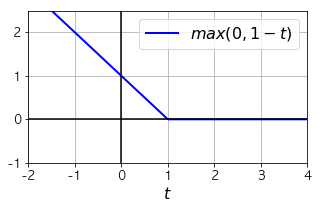

In [66]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
plt.show()

# 참조

https://www.youtube.com/watch?v=rHzX9CtjPeg&list=PLehuLRPyt1Hyi78UOkMPWCGRxGcA9NVOE&index=7

https://www.youtube.com/watch?v=_PwhiWxHK8o&t=2320s